# Final Project

    Name: Trisha Mandal         Github username: trish11953         USC ID: 1449602587

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import os
import glob
import re
import math
import numpy as np
import pandas as pd
from statistics import mean, stdev
import matplotlib.pyplot as plt
import statsmodels.api as sm
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Conv1D
from keras.layers import LSTM
from keras.layers import MaxPooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


# 1. Text Classification
It is highly recommended that you complete this project using Keras1 and Python.

(a) In this problem, we are trying to build a classifier to analyze the sentiment of reviews. You are provided with text data in two folders: one folder involves positive reviews, and one folder involves negative reviews.


In [5]:
# reference: https://docs.python.org/3/library/glob.html

# path1 = "~/Desktop/pastpapers/DSCI\ ML/PDF\ New\ Homework-8/FinalProject/data/neg"
# path1 = r"/Users/USERNAME/Desktop/somedir/somefile.txt"
path1 = "../data/neg"
path2 = "../data/pos"
neg = glob.glob(path1 + '/*')
pos = glob.glob(path2 + '/*')
reviewneg, reviewpos, sentimentneg, sentimentpos = [], [], [], []
for f in neg:
    with open(f, 'r') as f:
        reviewneg.append(f.read())
        sentimentneg.append(0)
for f in pos:
    with open(f, 'r') as f:
        reviewpos.append(f.read())
        sentimentpos.append(1)

(b) Data Exploration and Pre-processing

i. You can use binary encoding for the sentiments , i.e y = 1 for positive senti-
ments and y = −1 for negative sentiments.

In [6]:
rneg = pd.DataFrame (reviewneg, columns = ['Review'])
rpos = pd.DataFrame (reviewpos, columns = ['Review'])
sneg = pd.DataFrame (sentimentneg, columns = ['Sentiment'])
spos = pd.DataFrame (sentimentpos, columns = ['Sentiment'])
hneg = pd.concat([rneg, sneg], axis=1)
hpos = pd.concat([rpos, spos], axis=1)
data = pd.concat([hneg, hpos], axis=0)
data

Review  Sentiment
0    bad . bad . \nbad . \nthat one word seems to p...          0
1    isn't it the ultimate sign of a movie's cinema...          0
2     " gordy " is not a movie , it is a 90-minute-...          0
3    disconnect the phone line . \ndon't accept the...          0
4    when robert forster found himself famous again...          0
..                                                 ...        ...
995  one of the funniest carry on movies and the th...          1
996  i remember making a pact , right after `patch ...          1
997  barely scrapping by playing at a nyc piano bar...          1
998  if the current trends of hollywood filmmaking ...          1
999  capsule : the director of cure brings a weird ...          1

[2000 rows x 2 columns]

ii. The data are pretty clean. Remove the punctuation and numbers from the
data.

In [7]:
# reference: https://stackoverflow.com/questions/12851791/removing-numbers-from-string

data["Review"] = data["Review"].apply(lambda x: re.sub('\W+', ' ', x))
data["Review"] = data["Review"].apply(lambda x: x.strip()) 
data["Review"] = data["Review"].apply(lambda x: re.sub(r"\d+", ' ', x))
data["Review"] = data["Review"].apply(lambda x: x.replace("  ", " "))


In [8]:
data

Review  Sentiment
0    bad bad bad that one word seems to pretty much...          0
1    isn t it the ultimate sign of a movie s cinema...          0
2    gordy is not a movie it is a  minute long sesa...          0
3    disconnect the phone line don t accept the cha...          0
4    when robert forster found himself famous again...          0
..                                                 ...        ...
995  one of the funniest carry on movies and the th...          1
996  i remember making a pact right after patch ada...          1
997  barely scrapping by playing at a nyc piano bar...          1
998  if the current trends of hollywood filmmaking ...          1
999  capsule the director of cure brings a weird an...          1

[2000 rows x 2 columns]

In [9]:
data["Review"].iloc[1]

'isn t it the ultimate sign of a movie s cinematic ineptitude when you can t think of much to say about it other than it sucks one of the first official year  releases supernova is such a movie i can t seem to get past one word adjectives with this one although boring stupid and absurd doesn t amount to much of a review a shame i would have been able to save myself the chore of desperately trying to elaborate but c est la vie here goes nothing i ll keep it short i suppose the first bad omen for supernova came when director walter hill  hours removed his name from the movie requesting that it be replaced with the pseudonym thomas lee the film s fate was sealed in many minds when struggling studio mgm declined to screen it for the press an event usually signifying a studio s lack of confidence in a particular movie hill s and mgm s actions were prudent when the captain of medical space vessel nightingale dies in a tragic hyperjump accident a reformed drug addict who is also the first off

iii. The name of each text file starts with cv number. Use text files 0-699 in each class for training and 700-999 for testing.

In [10]:
negative = data.iloc[0:1000, 0:2]
positive = data.iloc[1000:2000, 0:2]
n1 = negative.iloc[0:700, 0:2]
n2 = negative.iloc[700:1000, 0:2]
p1 = positive.iloc[0:700, 0:2]
p2 = positive.iloc[700:1000, 0:2]
trainingset = pd.concat([n1, p1], axis=0)
testingset = pd.concat([n2, p2], axis=0)
trainingset

Review  Sentiment
0    bad bad bad that one word seems to pretty much...          0
1    isn t it the ultimate sign of a movie s cinema...          0
2    gordy is not a movie it is a  minute long sesa...          0
3    disconnect the phone line don t accept the cha...          0
4    when robert forster found himself famous again...          0
..                                                 ...        ...
695  the opening crawl tells us that the galaxy is ...          1
696  what surprises me most about the long awaited ...          1
697  i like movies with albert brooks and i really ...          1
698  i must say from the outset that i have never b...          1
699  when i left the theater after seeing david lyn...          1

[1400 rows x 2 columns]

In [11]:
data.reset_index(drop=True)
trainingset.reset_index(drop=True)
testingset.reset_index(drop=True)
data["Sentiment"][0]

Review  Sentiment
0     bad bad bad that one word seems to pretty much...          0
1     isn t it the ultimate sign of a movie s cinema...          0
2     gordy is not a movie it is a  minute long sesa...          0
3     disconnect the phone line don t accept the cha...          0
4     when robert forster found himself famous again...          0
...                                                 ...        ...
1995  one of the funniest carry on movies and the th...          1
1996  i remember making a pact right after patch ada...          1
1997  barely scrapping by playing at a nyc piano bar...          1
1998  if the current trends of hollywood filmmaking ...          1
1999  capsule the director of cure brings a weird an...          1

[2000 rows x 2 columns]

Review  Sentiment
0     bad bad bad that one word seems to pretty much...          0
1     isn t it the ultimate sign of a movie s cinema...          0
2     gordy is not a movie it is a  minute long sesa...          0
3     disconnect the phone line don t accept the cha...          0
4     when robert forster found himself famous again...          0
...                                                 ...        ...
1395  the opening crawl tells us that the galaxy is ...          1
1396  what surprises me most about the long awaited ...          1
1397  i like movies with albert brooks and i really ...          1
1398  i must say from the outset that i have never b...          1
1399  when i left the theater after seeing david lyn...          1

[1400 rows x 2 columns]

Review  Sentiment
0    synopsis cro magnon ayla loses her mother to a...          0
1    contrary to popular belief not every single fo...          0
2    and i thought stigmata would be the worst reli...          0
3     years ago national lampoon introduced us to a...          0
4    roger ebert asks in his review of sexy beast w...          0
..                                                 ...        ...
595  one of the funniest carry on movies and the th...          1
596  i remember making a pact right after patch ada...          1
597  barely scrapping by playing at a nyc piano bar...          1
598  if the current trends of hollywood filmmaking ...          1
599  capsule the director of cure brings a weird an...          1

[600 rows x 2 columns]

0    0
0    1
Name: Sentiment, dtype: int64

iv. Count the number of unique words in the whole dataset (train + test) and print it out.

In [12]:
#reference: https://www.geeksforgeeks.org/print-unique-words-string/
s = set()
data['Review'].str.lower().str.split().apply(s.update)
print("Number of unique words: ", len(s))

0      None
1      None
2      None
3      None
4      None
       ... 
995    None
996    None
997    None
998    None
999    None
Name: Review, Length: 2000, dtype: object

Number of unique words:  39204


v. Calculate the average review length and the standard deviation of review lengths. Report the results.

In [13]:
numofwords = data["Review"].apply(lambda x: len(str(x).split(' ')))
print("Average of Review Length: ", mean(numofwords))
print("Standard Deviation of Review Length: ", stdev(numofwords))
numofwords

Average of Review Length:  668.425
Standard Deviation of Review Length:  294.64309877006525


0      1097
1       591
2       502
3       629
4       404
       ... 
995     446
996     694
997     370
998     747
999     661
Name: Review, Length: 2000, dtype: int64

vi. Plot the histogram of review lengths.

(array([ 79., 531., 760., 406., 134.,  52.,  23.,  12.,   0.,   3.]),
 array([  17. ,  261.5,  506. ,  750.5,  995. , 1239.5, 1484. , 1728.5,
        1973. , 2217.5, 2462. ]),
 <BarContainer object of 10 artists>)

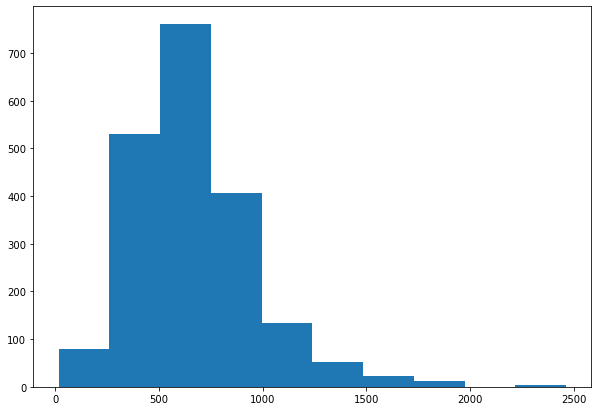

In [14]:
#reference: https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/#:~:text=To%20create%20a%20histogram%20the,The%20matplotlib.
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(numofwords)
plt.show()

vii. To represent each text (= data point), there are many ways. In NLP/Deep Learning terminology, this task is called tokenization. It is common to rep- resent text using popularity/ rank of words in text. The most common word in the text will be represented as 1, the second most common word will be represented as 2, etc. Tokenize each text document using this method.

In [15]:
# Taken from code snippets given to us
docs = data["Review"]
t = Tokenizer()
t.fit_on_texts(docs)
print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)
tokens = t.texts_to_matrix(docs, mode='count')
print(tokens)

OrderedDict([('bad', 1396), ('that', 15927), ('one', 5854), ('word', 231), ('seems', 1033), ('to', 31939), ('pretty', 528), ('much', 2050), ('sums', 20), ('up', 3407), ('beyond', 181), ('the', 76574), ('valley', 19), ('of', 34126), ('dolls', 16), ('if', 2799), ('summary', 12), ('isn', 871), ('t', 6429), ('enough', 910), ('for', 9961), ('you', 5317), ('how', 1517), ('about', 3524), ('a', 38111), ('still', 1048), ('haven', 157), ('got', 470), ('point', 685), ('other', 1948), ('than', 2474), ('director', 1237), ('russ', 10), ('meyer', 38), ('s', 18886), ('predilection', 5), ('casting', 129), ('attractive', 83), ('large', 177), ('breasted', 7), ('women', 276), ('who', 5692), ('ultimately', 158), ('expose', 18), ('afore', 5), ('mentioned', 94), ('anatomical', 1), ('areas', 25), ('there', 3771), ('is', 25203), ('really', 1565), ('only', 2495), ('reason', 437), ('recommend', 106), ('even', 2565), ('taking', 242), ('look', 835), ('at', 4988), ('this', 9579), ('movie', 5775), ('fact', 805), ('i

[[ 0. 60. 36. ...  0.  0.  0.]
 [ 0. 28. 19. ...  0.  0.  0.]
 [ 0. 25. 17. ...  0.  0.  0.]
 ...
 [ 0. 13. 23. ...  0.  0.  0.]
 [ 0. 49. 13. ...  0.  0.  0.]
 [ 0. 33. 18. ...  1.  1.  1.]]


viii. Select a review length L that 70% of the reviews have a length below it. If you feel more adventurous, set the threshold to 90%.

In [16]:
# reference: https://numpy.org/doc/stable/reference/generated/numpy.percentile.html
l = np.percentile(numofwords,90)
print("Review Length for threshold 70%: ", l)

Review Length for threshold 70%:  1033.0


ix. Truncate reviews longer than L words and zero-pad reviews shorter than L so that all texts (= data points) are of length L.

In [17]:
# reference: https://medium.com/@canerkilinc/padding-for-nlp-7dd8598c916a
padded = pad_sequences(tokens,padding="post",truncating= "post",maxlen=round(l))
padded.shape

(2000, 1033)

(c) Word Embeddings

i. One can use tokenized text as inputs to a deep neural network. However, a recent breakthrough in NLP suggests that more sophisticated representations of text yield better results. These sophisticated representations are called word embeddings. “Word embedding is a term used for representation of words for text analysis, typically in the form of a real-valued vector that encodes the meaning of the word such that the words that are closer in the vector space are expected to be similar in meaning.”4. Most deep learning modules (including Keras) provide a convenient way to convert positive integer rep- resentations of words into a word embedding by an “Embedding layer.” The layer accepts arguments that define the mapping of words into embeddings,including the maximum number of expected words also called the vocabulary size (e.g. the largest integer value). The layer also allows you to specify the dimension for each word vector, called the “output dimension.” We would like to use a word embedding layer for this project. Assume that we are inter- ested in the top 5,000 words. This means that in each integer sequence that represents each document, we set to zero those integers that represent words that are not among the top 5,000 words in the document. If you feel more adventurous, use all the words that appear in this corpus. Choose the length of the embedding vector for each word to be 32. Hence, each document is represented as a 32 × L matrix.

In [18]:
#reference: https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
model = Sequential()
model.add(Embedding(5000, 32, input_length = round(l)))


2022-07-25 22:18:42.297911: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


ii. Flatten the matrix of each document to a vector

In [19]:
model.add(Flatten())

In [20]:
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1033, 32)          160000    
                                                                 
 flatten (Flatten)           (None, 33056)             0         
                                                                 
 dense (Dense)               (None, 1)                 33057     
                                                                 
Total params: 193,057
Trainable params: 193,057
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
model.fit(padded, np.array(data["Sentiment"]), epochs=2, verbose=0)
loss, accuracy = model.evaluate(padded, np.array(data["Sentiment"]), verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 88.650000


(d) Multi-Layer Perceptron

i. Train a MLP with three (dense) hidden layers each of which has 50 ReLUs and one output layer with a single sigmoid neuron. Use a dropout rate of 20% for the first layer and 50% for the other layers. Use ADAM optimizer and binary cross entropy loss (which is equivalent to having a softmax in the output). To avoid overfitting, just set the number of epochs as 2. Use a batch size of 10.

In [22]:
docs2 = trainingset["Review"]
t2 = Tokenizer()
t2.fit_on_texts(docs2)
print(t2.word_counts)
print(t2.document_count)
print(t2.word_index)
print(t2.word_docs)
tokens2 = t2.texts_to_matrix(docs2, mode='count')
print(tokens2)

OrderedDict([('bad', 948), ('that', 11233), ('one', 4122), ('word', 157), ('seems', 723), ('to', 22514), ('pretty', 351), ('much', 1443), ('sums', 15), ('up', 2397), ('beyond', 116), ('the', 53991), ('valley', 9), ('of', 24056), ('dolls', 11), ('if', 1969), ('summary', 9), ('isn', 598), ('t', 4533), ('enough', 641), ('for', 7085), ('you', 3763), ('how', 1111), ('about', 2481), ('a', 26721), ('still', 732), ('haven', 103), ('got', 310), ('point', 483), ('other', 1426), ('than', 1735), ('director', 868), ('russ', 9), ('meyer', 30), ('s', 13228), ('predilection', 3), ('casting', 98), ('attractive', 50), ('large', 122), ('breasted', 6), ('women', 200), ('who', 4044), ('ultimately', 117), ('expose', 13), ('afore', 4), ('mentioned', 65), ('anatomical', 1), ('areas', 16), ('there', 2656), ('is', 17724), ('really', 1087), ('only', 1755), ('reason', 322), ('recommend', 73), ('even', 1835), ('taking', 173), ('look', 607), ('at', 3550), ('this', 6760), ('movie', 4040), ('fact', 565), ('it', 11372

[[ 0. 60. 36. ...  0.  0.  0.]
 [ 0. 28. 19. ...  0.  0.  0.]
 [ 0. 25. 17. ...  0.  0.  0.]
 ...
 [ 0. 55. 27. ...  0.  0.  0.]
 [ 0. 26. 18. ...  0.  0.  0.]
 [ 0. 46. 27. ...  1.  1.  1.]]


In [23]:
padded2 = pad_sequences(tokens2,padding="post",truncating= "post",maxlen=round(l))
padded2.shape

(1400, 1033)

In [24]:
len(tokens2)

1400

In [25]:
model2 = Sequential()
model2.add(Embedding(5000, 32, input_length = round(l)))

In [26]:
model2.add(Flatten())
model2.add(Dense(50,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(50,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(50,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1033, 32)          160000    
                                                                 
 flatten_1 (Flatten)         (None, 33056)             0         
                                                                 
 dense_1 (Dense)             (None, 50)                1652850   
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 50)               

In [27]:
docs3 = testingset["Review"]
t3 = Tokenizer()
t3.fit_on_texts(docs3)
print(t3.word_counts)
print(t3.document_count)
print(t3.word_index)
print(t3.word_docs)
tokens3 = t3.texts_to_matrix(docs3, mode='count')
print(tokens3)

OrderedDict([('synopsis', 21), ('cro', 2), ('magnon', 2), ('ayla', 6), ('loses', 28), ('her', 1391), ('mother', 117), ('to', 9425), ('an', 1684), ('earthquake', 7), ('and', 10541), ('escapes', 12), ('certain', 61), ('death', 160), ('by', 1953), ('a', 11390), ('lion', 7), ('reluctantly', 13), ('rescued', 7), ('neanderthal', 4), ('clan', 15), ('who', 1648), ('likes', 29), ('have', 1477), ('sex', 148), ('doggy', 2), ('style', 98), ('grows', 24), ('up', 1010), ('become', 154), ('blond', 8), ('feminist', 6), ('supermodel', 5), ('challenges', 4), ('the', 22583), ('patriarchy', 1), ('throwing', 15), ('rocks', 8), ('giving', 73), ('birth', 16), ('without', 199), ('mate', 10), ('comments', 20), ('allow', 22), ('me', 441), ('state', 43), ('for', 2876), ('record', 21), ('that', 4694), ('i', 2615), ('find', 260), ('daryl', 10), ('hannah', 8), ('appealing', 31), ('presence', 52), ('in', 6491), ('movies', 400), ('she', 903), ('proved', 10), ('quite', 194), ('charming', 25), ('as', 3375), ('intellige

[[ 0. 74. 35. ...  0.  0.  0.]
 [ 0. 24. 18. ...  0.  0.  0.]
 [ 0. 68. 38. ...  0.  0.  0.]
 ...
 [ 0. 13. 23. ...  0.  0.  0.]
 [ 0. 49. 13. ...  0.  0.  0.]
 [ 0. 33. 18. ...  1.  1.  1.]]


In [28]:
padded3 = pad_sequences(tokens3,padding="post",truncating= "post",maxlen=round(l))
padded3.shape

(600, 1033)

In [29]:
model3 = Sequential()
model3.add(Embedding(5000, 32, input_length = round(l)))

In [30]:
model3.add(Flatten())
model3.add(Dense(50,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(50,activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(50,activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(1,activation='sigmoid'))
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model3.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1033, 32)          160000    
                                                                 
 flatten_2 (Flatten)         (None, 33056)             0         
                                                                 
 dense_5 (Dense)             (None, 50)                1652850   
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 50)                2550      
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_7 (Dense)             (None, 50)               

ii. Report the train and test accuracies of this model.

In [31]:
testingset['Sentiment'].value_counts()

0    300
1    300
Name: Sentiment, dtype: int64

In [32]:
model2.fit(padded2, np.array(trainingset["Sentiment"]), epochs=2, verbose=0, batch_size = 10)
loss, accuracy = model2.evaluate(padded2, np.array(trainingset["Sentiment"]), verbose=0)
print('Training set Accuracy: %f' % (accuracy*100))

Training set Accuracy: 54.142857


In [33]:
loss, accuracy = model3.evaluate(padded3, np.array(testingset["Sentiment"]), verbose=0)
print('Testing set Accuracy: %f' % (accuracy*100))

Testing set Accuracy: 49.166667


(e) One-Dimensional Convolutional Neural Network:
Although CNNs are mainly used for image data, they can also be applied to text data, as text also has adjacency information. Keras supports one-dimensional convolutions and pooling by the Conv1D and MaxPooling1D classes respectively.

i. After the embedding layer, insert a Conv1D layer. This convolutional layer has 32 feature maps , and each of the 32 kernels has size 3, i.e. reads embedded word representations 3 vector elements of the word embedding at a time. The convolutional layer is followed by a 1D max pooling layer with a length and stride of 2 that halves the size of the feature maps from the convolutional layer. The rest of the network is the same as the neural network above.

In [34]:
#reference: https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/
model4 = Sequential()
model4.add(Embedding(5000, 32, input_length = round(l)))
model4.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(round(l),32)))
model4.add(MaxPooling1D(pool_size=2))
model4.add(Flatten())
model4.add(Dense(50,activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(50,activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(50,activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(1,activation='sigmoid'))
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model4.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1033, 32)          160000    
                                                                 
 conv1d (Conv1D)             (None, 1031, 32)          3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 515, 32)          0         
 )                                                               
                                                                 
 flatten_3 (Flatten)         (None, 16480)             0         
                                                                 
 dense_9 (Dense)             (None, 50)                824050    
                                                                 
 dropout_6 (Dropout)         (None, 50)                0         
                                                      

ii. Report the train and test accuracies of this model.

In [35]:
model4.fit(padded2, np.array(trainingset["Sentiment"]), epochs=2, verbose=0, batch_size = 10)
loss, accuracy = model4.evaluate(padded2, np.array(trainingset["Sentiment"]), verbose=0)
print('Training set Accuracy: %f' % (accuracy*100))

Training set Accuracy: 77.785712


In [36]:
loss, accuracy = model4.evaluate(padded3, np.array(testingset["Sentiment"]), verbose=0)
print('Testing set Accuracy: %f' % (accuracy*100))

Testing set Accuracy: 54.333335


(f) Long Short-Term Memory Recurrent Neural Network:
The structure of the LSTM we are going to use is shown in the following figure.

i. Each word is represented to LSTM as a vector of 32 elements and the LSTM is followed by a dense layer of 256 ReLUs. Use a dropout rate of 0.2 for both LSTM and the dense layer. Train the model using 10-50 epochs and batch size of 10.

In [40]:
model5= Sequential()
model5.add(Embedding(5000,32,input_length=round(l)))
model5.add(LSTM(units=32,dropout=0.2))
model5.add(Dropout(0.2))
model5.add(Flatten())
model5.add(Dense(256,activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(1,activation='sigmoid'))
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model5.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 1033, 32)          160000    
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 flatten_5 (Flatten)         (None, 32)                0         
                                                                 
 dense_15 (Dense)            (None, 256)               8448      
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 1)                

ii. Report the train and test accuracies of this model.

In [41]:
model5.fit(padded2, np.array(trainingset["Sentiment"]), epochs=50, verbose=0, batch_size = 10)
loss, accuracy = model5.evaluate(padded2, np.array(trainingset["Sentiment"]), verbose=0)
print('Training set Accuracy: %f' % (accuracy*100))

Training set Accuracy: 61.642855


In [42]:
loss, accuracy = model5.evaluate(padded3, np.array(testingset["Sentiment"]), verbose=0)
print('Testing set Accuracy: %f' % (accuracy*100))

Testing set Accuracy: 52.333331


# References

https://docs.python.org/3/library/glob.html

https://stackoverflow.com/questions/12851791/removing-numbers-from-string

https://www.geeksforgeeks.org/print-unique-words-string/

https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/#:~:text=To%20create%20a%20histogram%20the,The%20matplotlib.

https://numpy.org/doc/stable/reference/generated/numpy.percentile.html

https://medium.com/@canerkilinc/padding-for-nlp-7dd8598c916a

https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/